# Лабораторная работа 3 — Регрессионный анализ
**Вариант 1 — salary.csv, regression.xlsx**

### Часть 1 - Простая линейная регрессия

#### Импорт библиотек + работа с данными

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics


#Чтение данных
df = pd.read_excel("regression.xlsx", sheet_name=1)

#Нормализация и определение имён столбцов
df.columns = [str(c).strip() for c in df.columns]
x1_name, x2_name, y_name = "x1", "x2", "y"

#Берём только нужные столбцы и удаляем пропуски
data = df[[x1_name, x2_name, y_name]].dropna().reset_index(drop=True)

print(f"Лист: 1")
print(f"Колонки: x1='{x1_name}', x2='{x2_name}', y='{y_name}'")
display(data.head())

Лист: 1
Колонки: x1='x1', x2='x2', y='y'


,x1,x2,y
0,0.847155,-1.399949,2.320641
1,-1.826229,-1.633151,-1.001832
2,-1.053944,1.856604,-2.773939
3,-1.847987,-1.963565,-1.511325
4,1.997064,0.650885,2.852593


* Импортированы библиотеки (numpy, pandas, matplotlib, seaborn, sklearn). 
* Загружен файл regression.xlsx и выбрана нужная страница. 
* Пропуски удалены, данные подготовлены.

#### Функция обучения + метрики

In [2]:
def run_simple_lr(df_local, x_col, y_col):
    X = df_local[[x_col]].values
    y = df_local[y_col].values

    model = LinearRegression()
    model.fit(X, y)
    preds = model.predict(X)

    a = float(model.coef_[0])       #наклон
    b = float(model.intercept_)     #свободный член

    mse  = metrics.mean_squared_error(y, preds)
    mae  = metrics.mean_absolute_error(y, preds)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score(y, preds)

    comp = pd.DataFrame({"Actual": y, "Predicted": preds})
    return {"model": model, "a": a, "b": b, "mse": mse, "mae": mae, "rmse": rmse, "r2": r2, "comp": comp}

* обучает простую линейную регрессию (LinearRegression)
* возвращает коэффициенты a (наклон) и b (свободный член)
* вычисляет метрики качества (MSE, MAE, RMSE, R²)
* создаёт DataFrame с реальными и предсказанными значениями

#### Построение моделей и подсчёт их метрик

In [3]:
#Модели
res_x1 = run_simple_lr(data, x1_name, y_name)
res_x2 = run_simple_lr(data, x2_name, y_name)

print("\n=== Коэффициенты и метрики (x1 → y) ===")
print(f"a = {res_x1['a']:.6f},  b = {res_x1['b']:.6f}")
print(f"MSE={res_x1['mse']:.6f}, MAE={res_x1['mae']:.6f}, RMSE={res_x1['rmse']:.6f}, R²={res_x1['r2']:.6f}")
display(res_x1["comp"].head())

print("\n=== Коэффициенты и метрики (x2 → y) ===")
print(f"a = {res_x2['a']:.6f},  b = {res_x2['b']:.6f}")
print(f"MSE={res_x2['mse']:.6f}, MAE={res_x2['mae']:.6f}, RMSE={res_x2['rmse']:.6f}, R²={res_x2['r2']:.6f}")
display(res_x2["comp"].head())

#Сводная таблица
summary = pd.DataFrame([
    {"Модель": f"{x1_name} → {y_name}", "a": res_x1["a"], "b": res_x1["b"],
     "MSE": res_x1["mse"], "MAE": res_x1["mae"], "RMSE": res_x1["rmse"], "R2": res_x1["r2"]},
    {"Модель": f"{x2_name} → {y_name}", "a": res_x2["a"], "b": res_x2["b"],
     "MSE": res_x2["mse"], "MAE": res_x2["mae"], "RMSE": res_x2["rmse"], "R2": res_x2["r2"]},
])
display(summary.round(4))


=== Коэффициенты и метрики (x1 → y) ===
a = 1.032026,  b = -0.034727
MSE=1.895711, MAE=1.148935, RMSE=1.376848, R²=0.428270


,Actual,Predicted
0,2.320641,0.839560
1,-1.001832,-1.919443
2,-2.773939,-1.122424
3,-1.511325,-1.941897
4,2.852593,2.026295



=== Коэффициенты и метрики (x2 → y) ===
a = -0.958672,  b = -0.034639
MSE=2.090334, MAE=1.100438, RMSE=1.445799, R²=0.369574


,Actual,Predicted
0,2.320641,1.307453
1,-1.001832,1.531017
2,-2.773939,-1.814515
3,-1.511325,1.847776
4,2.852593,-0.658625


,Модель,a,b,MSE,MAE,RMSE,R2
0,x1 → y,1.0320,-0.0347,1.8957,1.1489,1.3768,0.4283
1,x2 → y,-0.9587,-0.0346,2.0903,1.1004,1.4458,0.3696


* Обучены две модели:
    1) x1 -> y
    2) x2 -> y
* Подсчитаны метрики и собраны в сводную таблицу

#### Построение графиков

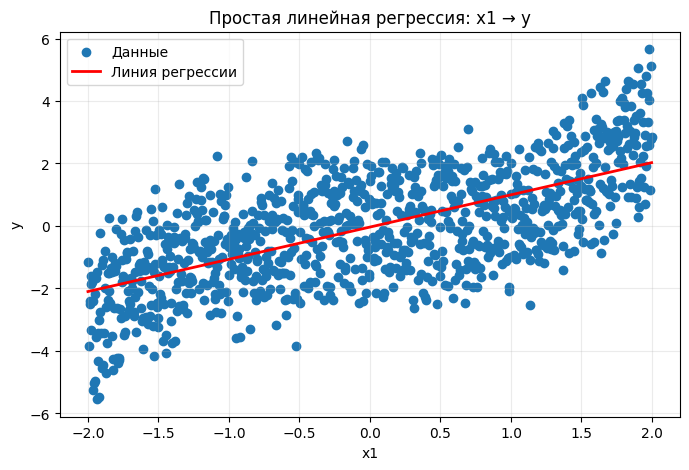

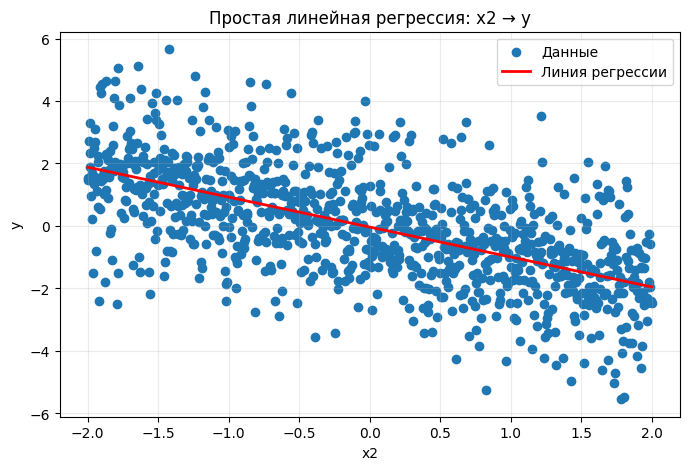

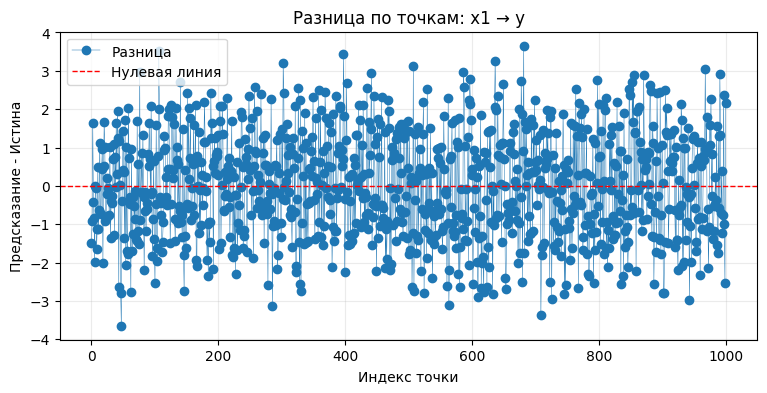

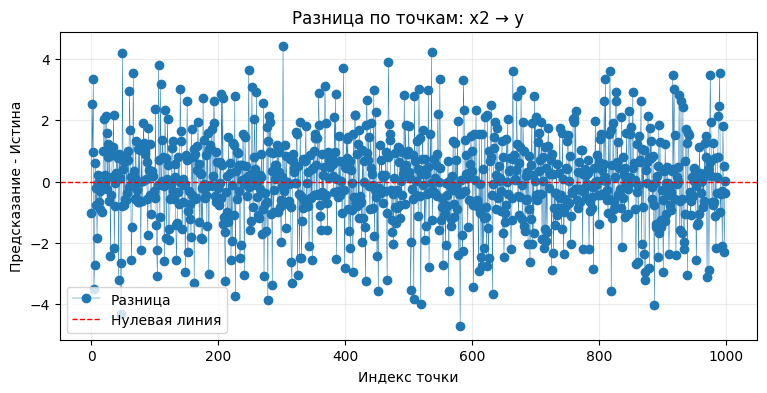

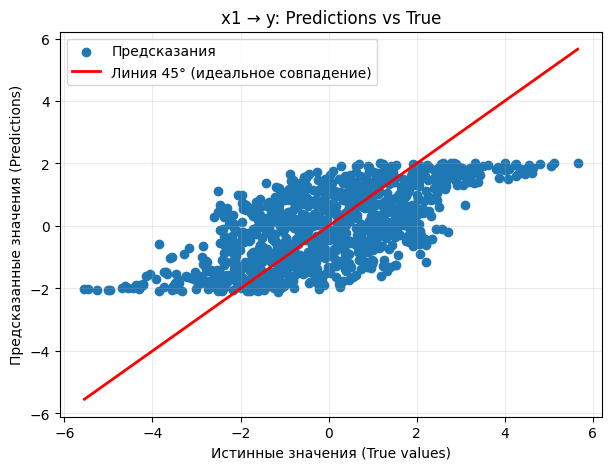

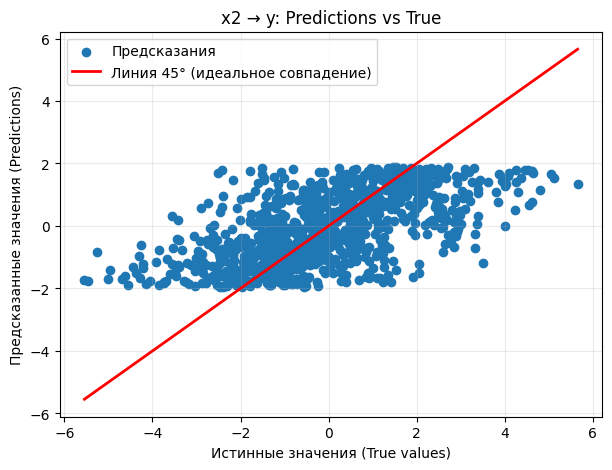

In [4]:
#Scatter + линия регрессии
def plot_scatter_with_line(df_local, x_col, y_col, model, title):
    X = df_local[[x_col]].values
    y = df_local[y_col].values

    plt.figure(figsize=(8,5))
    plt.scatter(X, y, label="Данные")
    x_min, x_max = X.min(), X.max()
    x_line = np.linspace(x_min, x_max, 200).reshape(-1, 1)
    y_line = model.predict(x_line)
    plt.plot(x_line, y_line, color="red", linewidth=2, label="Линия регрессии")
    plt.xlabel(x_col); plt.ylabel(y_col); plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.25)
    plt.show()

plot_scatter_with_line(data, x1_name, y_name, res_x1["model"], f"Простая линейная регрессия: {x1_name} → {y_name}")
plot_scatter_with_line(data, x2_name, y_name, res_x2["model"], f"Простая линейная регрессия: {x2_name} → {y_name}")

#График разницы (Predicted - Actual)
def plot_pointwise_diff(comp_df, title):
    diff = comp_df["Predicted"] - comp_df["Actual"]
    plt.figure(figsize=(9,4))
    plt.plot(range(len(diff)), diff, marker="o", linewidth=0.35, label="Разница")
    plt.axhline(0, color="red", linestyle="--", linewidth=1, label="Нулевая линия")
    plt.xlabel("Индекс точки"); plt.ylabel("Предсказание - Истина"); plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.25)
    plt.show()

plot_pointwise_diff(res_x1["comp"], f"Разница по точкам: {x1_name} → {y_name}")
plot_pointwise_diff(res_x2["comp"], f"Разница по точкам: {x2_name} → {y_name}")

#График Predictions vs True 
def plot_pred_vs_true(comp_df, title):
    y_true = comp_df["Actual"].values
    y_pred = comp_df["Predicted"].values
    vmin = min(y_true.min(), y_pred.min())
    vmax = max(y_true.max(), y_pred.max())

    plt.figure(figsize=(7,5))
    plt.scatter(y_true, y_pred, label="Предсказания")
    plt.plot([vmin, vmax], [vmin, vmax], color="red", linewidth=2, label="Линия 45° (идеальное совпадение)")
    plt.xlabel("Истинные значения (True values)")
    plt.ylabel("Предсказанные значения (Predictions)")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.25)
    plt.show()

plot_pred_vs_true(res_x1["comp"], f"{x1_name} → {y_name}: Predictions vs True")
plot_pred_vs_true(res_x2["comp"], f"{x2_name} → {y_name}: Predictions vs True")

Были построены следующие графики:
* scatter + линия регрессии (красная)
    1) Для x₁ → y — точки располагаются вдоль красной линии под углом, связь положительная (чем выше x₁, тем выше y).
    2) Для x₂ → y — зависимость отрицательная (при росте x₂, y уменьшается).
    3) Оба графика показывают, что данные не идеально линейны, но тенденция выражена.
* графики ошибок (Predicted − Actual)
    1) Систематического смещения не наблюдается.
    2) Разброс ошибок ±4 говорит, что модель не идеальна, но устойчива.
* графики “Predictions vs True” с линией идеального совпадения
    1) Модель x₁ → y предсказывает лучше: разброс точек меньше, зависимость ближе к идеальной линии.
    2) Модель x₂ → y работает хуже: разброс точек больше, значения более «сжаты» —
предсказания не дотягивают до крайних истинных значений.
    3) Для обеих моделей заметно, что линейная зависимость не идеально описывает данные —
присутствует нелинейный компонент, особенно в области больших |x|.
Поэтому на следующем этапе стоит попробовать добавить нелинейность, чтобы улучшить качество предсказаний.

### Часть 2 - Полиноминальная регрессия модели (x1 -> y)

База (линейная): MAE=1.1489, R²=0.4283

=== degree=2 ===
MAE=1.1481, R²=0.4289


,Actual,Predicted
0,2.320641,0.816050
1,-1.001832,-1.842996
2,-2.773939,-1.130917
3,-1.511325,-1.862398
4,2.852593,2.127675


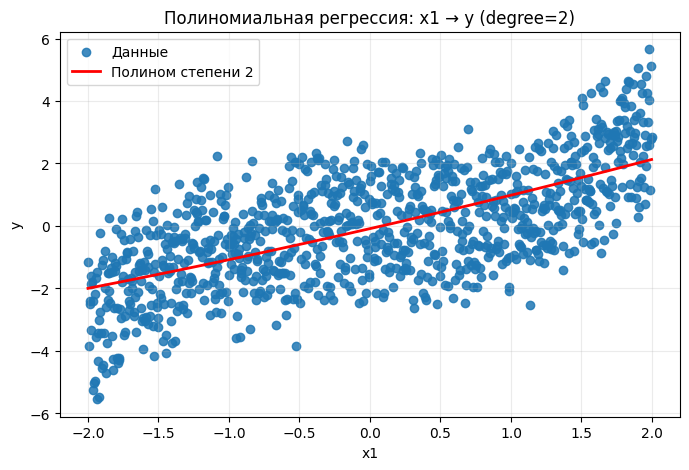


=== degree=3 ===
MAE=1.0983, R²=0.4839


,Actual,Predicted
0,2.320641,0.312787
1,-1.001832,-2.446359
2,-2.773939,-0.651089
3,-1.511325,-2.525129
4,2.852593,3.247716


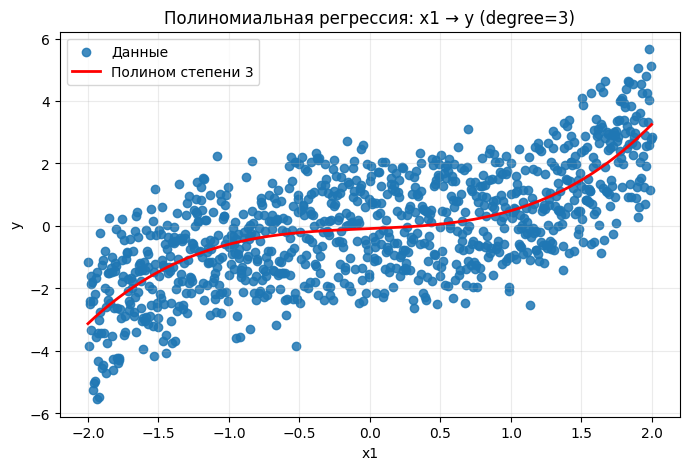


Сравнение (включая линейную базу degree=1):


,degree,MAE,R2
0,1,1.1489,0.4283
1,2,1.1481,0.4289
2,3,1.0983,0.4839


In [5]:
from sklearn.preprocessing import PolynomialFeatures

X = data[[x1_name]].values
y = data[y_name].values

#Базовая линейная модель для сравнения
lin = LinearRegression().fit(X, y)
y_lin = lin.predict(X)
mae_lin = metrics.mean_absolute_error(y, y_lin)
r2_lin  = metrics.r2_score(y, y_lin)

print(f"База (линейная): MAE={mae_lin:.4f}, R²={r2_lin:.4f}")

def run_poly_regression(X, y, degree: int):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mae = metrics.mean_absolute_error(y, y_pred)
    r2  = metrics.r2_score(y, y_pred)
    comp = pd.DataFrame({"Actual": y, "Predicted": y_pred})
    return {"poly": poly, "model": model, "comp": comp, "mae": mae, "r2": r2}

def plot_poly_fit(X, y, poly, model, degree, title_prefix="Полиномиальная регрессия"):
    plt.figure(figsize=(8,5))
    plt.scatter(X, y, alpha=0.85, label="Данные")
    x_min, x_max = X.min(), X.max()
    x_grid = np.linspace(x_min, x_max, 300).reshape(-1, 1)
    y_grid = model.predict(poly.transform(x_grid))
    plt.plot(x_grid, y_grid, color="red", linewidth=2, label=f"Полином степени {degree}")
    plt.xlabel(x1_name); plt.ylabel(y_name)
    plt.title(f"{title_prefix}: {x1_name} → {y_name} (degree={degree})")
    plt.legend()
    plt.grid(True, alpha=0.25)
    plt.show()

#Запускаем степени 2 и 3
degrees = [2, 3]
rows = []
for deg in degrees:
    res = run_poly_regression(X, y, degree=deg)
    print(f"\n=== degree={deg} ===")
    print(f"MAE={res['mae']:.4f}, R²={res['r2']:.4f}")
    display(res["comp"].head())
    plot_poly_fit(X, y, res["poly"], res["model"], degree=deg)
    rows.append({"degree": deg, "MAE": res["mae"], "R2": res["r2"]})

#Сводная таблица по степеням + линейная база
summary_poly = pd.DataFrame(rows).round(4)
summary_poly = pd.concat([
    pd.DataFrame([{"degree": 1, "MAE": mae_lin, "R2": r2_lin}]).round(4),
    summary_poly
], ignore_index=True)

print("\nСравнение (включая линейную базу degree=1):")
display(summary_poly)


Степень 1
* MAE ≈ 1.15, R² ≈ 0.43 → модель объясняет ~43% вариации данных.
* На графике видно, что линия в целом отражает тренд,
но не идеально повторяет форму распределения точек

Степень 2
* Метрики почти не изменились (MAE ≈ 1.1481, R² ≈ 0.4289)
* Это говорит о том, что добавление квадратичного члена x² не даёт существенного улучшения — данные не имеют явной параболической формы
* Визуально кривая практически совпадает с линейной линией

Степень 3
* Метрики заметно улучшились:
    1) MAE снизился до 1.0983 (ошибка меньше)
    2) R² вырос до 0.4839 (качество предсказания выше)
* На графике кривая уже немного изгибается,
что позволяет ей лучше «уловить» реальную форму распределения точек —
особенно на краях (при больших |x₁|)
* Однако изгиб остаётся умеренным, что говорит о умеренной нелинейности зависимости

### Часть 3 - Решение задачи регрессии различными методами

#### Определяем выбросы и убираем их

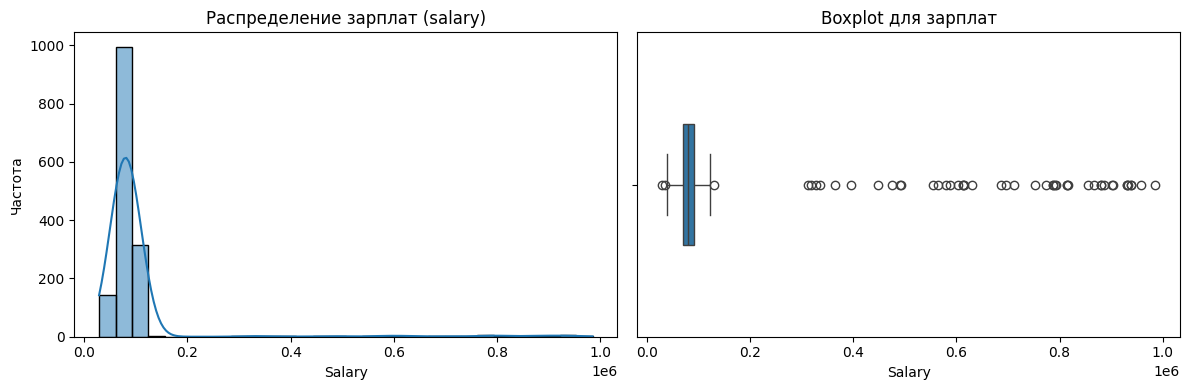

Было строк : 1500
Осталось строк после очистки выбросов: 1452
Удалено строк: 48


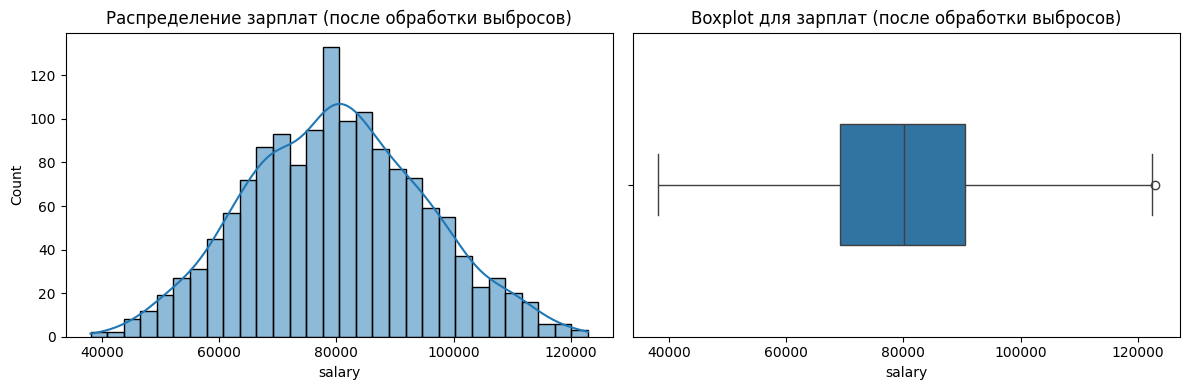

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import scatter_matrix

df = pd.read_csv("salary.csv")

#приведём имена колонок
df.columns = [c.strip() for c in df.columns]
target_col = "salary"



fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Гистограмма + KDE
sns.histplot(
    data=df, x=target_col, bins=30, kde=True,
    ax=axes[0], edgecolor="k", linewidth=1
)
axes[0].set_title("Распределение зарплат (salary)")
axes[0].set_xlabel("Salary")
axes[0].set_ylabel("Частота")

#Boxplot
sns.boxplot(
    data=df, x=target_col, ax=axes[1],
    width=0.4
)
axes[1].set_title("Boxplot для зарплат")
axes[1].set_xlabel("Salary")

plt.tight_layout()
plt.show()

#после очистки выбросов по IQR: гистограмма + boxplot
q1, q3 = df[target_col].quantile([0.25, 0.75])
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

rows_before = len(df)
df_clean = df[(df[target_col] >= low) & (df[target_col] <= high)].reset_index(drop=True)
rows_after = len(df_clean)
print(f"Было строк : {rows_before}")
print(f"Осталось строк после очистки выбросов: {rows_after}")
print(f"Удалено строк: {rows_before - rows_after}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Гистограмма + KDE
sns.histplot(
    data=df_clean, x=target_col, bins=30, kde=True,
    ax=axes[0], edgecolor="k", linewidth=1
)
axes[0].set_title("Распределение зарплат (после обработки выбросов)")
axes[0].set_xlabel("salary")
axes[0].set_ylabel("Count")

#Boxplot
sns.boxplot(
    data=df_clean, x=target_col, ax=axes[1],
    width=0.4
)
axes[1].set_title("Boxplot для зарплат (после обработки выбросов)")
axes[1].set_xlabel("salary")

plt.tight_layout()
plt.show()

Удаление 48 экстремов стабилизировало распределение цели → модели будут менее чувствительны к редким аномалиям и метрики

#### Матрица диаграмм рассеяния

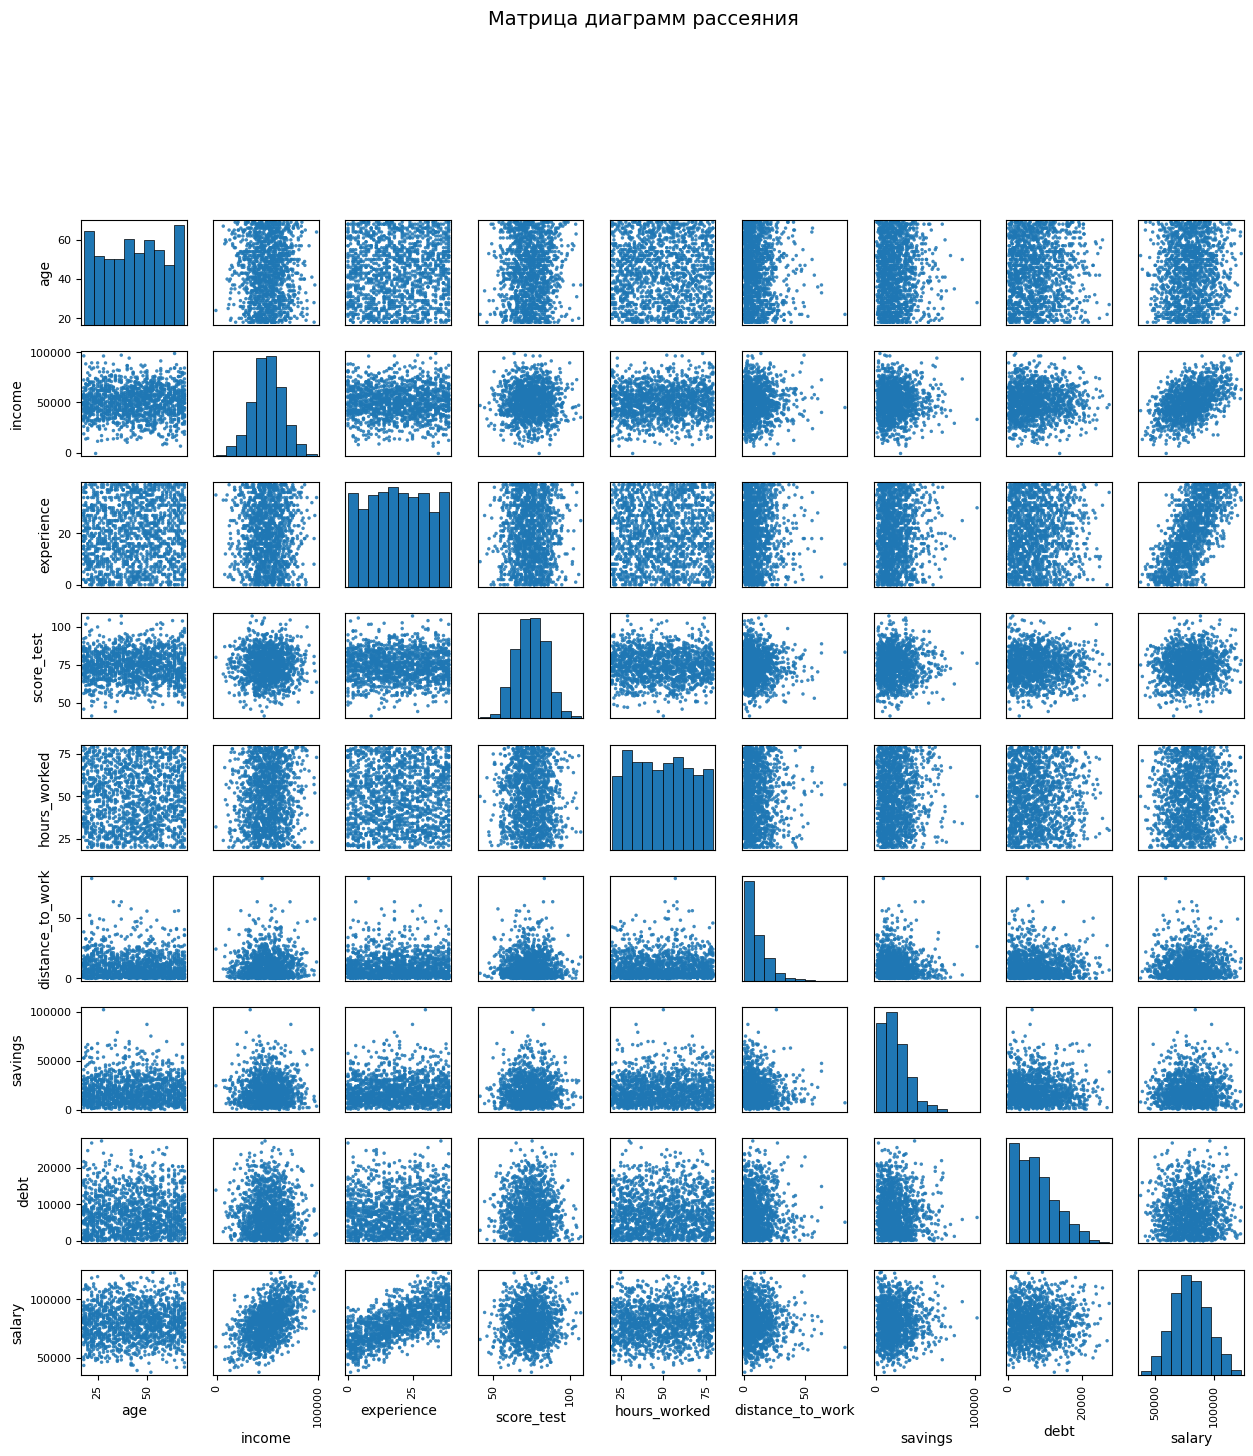

In [7]:
#какие колонки рисуем
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_sample = [c for c in numeric_cols if c != target_col]
scatter_cols = numeric_sample + [target_col]

#сам рисунок
axes = scatter_matrix(
    df_clean[scatter_cols],
    figsize=(15, 15),
    diagonal="hist",
    hist_kwds={"edgecolor": "k", "linewidth": 0.5},
    alpha=0.85, 
    s=25
)

#отступы между подграфиками, чтобы они не слипались
plt.subplots_adjust(wspace=0.25, hspace=0.25)

plt.suptitle("Матрица диаграмм рассеяния", y=1.02, fontsize=14)
plt.show()

* salary ~ income — явная положительная связь (самая заметная)
* salary ~ experience — умеренно положительная
* salary ~ score_test — слабее, но с трендом
* distance_to_work — визуально почти без связи с salary
* savings и debt демонстрируют ожидаемые паттерны (сильные хвосты/асимметрии)

Уже на уровне EDA видно, какие признаки стоит ожидать в топе важности для линейной регрессии: income, experience + часть категориальных

#### Разделить данные на обучающую и валидационные выборки

In [8]:
#Разделение на train/valid
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col].values

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42
)

#### Нормализовать числовые данные с помощью StandardScaler или другой функции

In [9]:
#Препроцессинг: нормализация числовых + OHE категориальных
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder='drop'
)

#### Обучить модель линейной регрессии с помощью LinearRegression и оценить её качество с помощью метрик

In [10]:
#Утилиты
def eval_regression(y_true, y_pred) -> dict:
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}

def plot_pred_vs_true(y_true, y_pred, title):
    vmin = min(y_true.min(), y_pred.min())
    vmax = max(y_true.max(), y_pred.max())
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, alpha=0.7, label="Предсказания")
    plt.plot([vmin, vmax], [vmin, vmax], 'r-', lw=2, label="Линия 45° (идеальное совпадение)")
    plt.xlabel("Истинные значения"); plt.ylabel("Предсказанные значения")
    plt.title(title); plt.legend(); plt.grid(True, alpha=0.25)
    plt.show()

#Линейная регрессия
lin_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])
lin_pipe.fit(X_train, y_train)
lin_pred = lin_pipe.predict(X_valid)
lin_metrics = eval_regression(y_valid, lin_pred)

print("Метрики LinearRegression:")
for k,v in lin_metrics.items():
    print(f"  {k}: {v:.4f}")

Метрики LinearRegression:
  MAE: 4915.8320
  MSE: 37419468.7769
  RMSE: 6117.1455
  MAPE: 0.0655
  R2: 0.8591


Разделил данные на train/valid (25% валидация, random_state=42). Настроил ColumnTransformer: StandardScaler на числовые и OneHotEncoder(handle_unknown="ignore") на категориальные. Собрал Pipeline(preprocess → LinearRegression). Таким образом получили чистый и воспроизводимый конвейер обучения; меньше риска «утечки данных». Масштабирование числовых признаков и OHE категорий корректно готовят вход для линейной модели; пайплайн удобен для смены модели и кросс-валидации в следующих шагах.

* MAE ≈ 4915.83
* MSE ≈ 37,419,468.78
* RMSE ≈ 6117.15
* MAPE ≈ 0.0655 (≈6.6%)
* R² ≈ 0.8591

Модель объясняет ~86% вариации salary — очень хороший результат для линейной модели. Средняя абсолютная ошибка ≈ 4.9k и средняя относительная ≈ 6.6% — предсказания достаточно точные.

#### Создать датафрейм с истинными и предсказанными значениями

In [11]:
#Таблица Actual vs Predicted
df_lin_pred = pd.DataFrame({"Actual": y_valid, "Predicted": lin_pred})
display(df_lin_pred.head())

,Actual,Predicted
0,90772.277599,90022.654163
1,84475.346122,88404.502189
2,67777.676332,63984.471940
3,110650.659849,106266.109689
4,68551.168300,67802.019474


Сформирован DataFrame со столбцами Actual и Predicted и выведена «шапка». Предсказания близки к истинным (например, 90,722 → 90,022; 84,475 → 88,404 и т.п.). 

#### Создать датафрейм с признаками и значением коэффициентов для каждого признака

In [12]:
#Коэффициенты важности (для LinearRegression)
#получаем имена признаков после трансформации, чтобы сопоставить с coef_
feature_names = []
if numeric_features:
    feature_names += numeric_features
if categorical_features:
    #добавим имена OHE: <col>_<category>
    ohe = lin_pipe.named_steps["preprocess"].named_transformers_["cat"]
    ohe_names = ohe.get_feature_names_out(categorical_features)
    feature_names = numeric_features + list(ohe_names)

coefs = lin_pipe.named_steps["model"].coef_.ravel()
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})
coef_df["AbsCoef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("AbsCoef", ascending=False)
display(coef_df.head(15))  # топ-важные признаки

,Feature,Coefficient,AbsCoef
2,experience,10293.710290,10293.710290
9,education_High School,-9488.317591,9488.317591
11,education_PhD,9376.859167,9376.859167
1,income,7334.341444,7334.341444
10,education_Master,3349.239470,3349.239470
8,education_Bachelor,-3237.781047,3237.781047
20,job_type_IT,2673.442174,2673.442174
21,job_type_Retail,-2117.075501,2117.075501
3,score_test,1093.627752,1093.627752
18,job_type_Finance,1081.305054,1081.305054


Получены имена фич после трансформации (numeric + OHE), извлечены coef_, собрана и отсортирована таблица по |коэффициенту|.
* experience — крупный положительный вклад
* Образование: PhD и Master — положительно, High School — отрицательно (относительно базовой категории)
* income — положительно
* Отрасли и город — ощутимые, но меньше по модулю
Числовые признаки масштабировались, категориальные — OHE (без масштабирования), поэтому сравнение абсолютных коэффициентов между группами «numeric vs OHE» делать аккуратно. Знаки интерпретируемы надёжно: больше опыта/дохода/высшее образование → выше salary; High School — минус к зарплате.

#### Визуализация: фактическое vs предсказанное

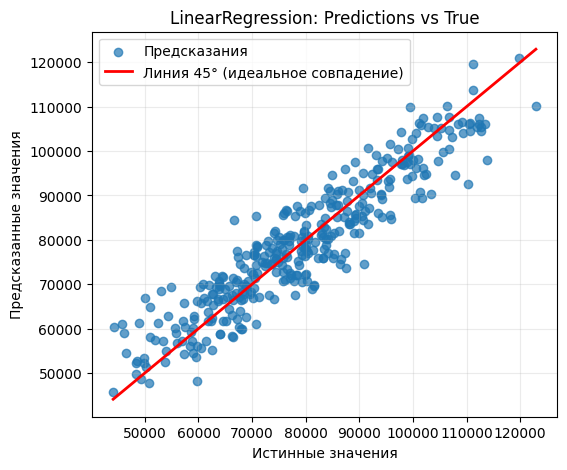

In [13]:
plot_pred_vs_true(y_valid, lin_pred, "LinearRegression: Predictions vs True")

Построен график предсказаний против истинных значений с красной линией. Облако точек плотно вдоль линии 45°, без выраженной систематической смещённости. Модель хорошо калибрована на валидации: ошибки в среднем симметричны, нет завышения/занижения.

#### Реализовать регрессию методом k-ближайших соседей или деревом решений

In [14]:
#KNN и Дерево решений
knn_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsRegressor(n_neighbors=5))
])
tree_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeRegressor(random_state=42, max_depth=None))
])

knn_pipe.fit(X_train, y_train)
tree_pipe.fit(X_train, y_train)

knn_pred = knn_pipe.predict(X_valid)
tree_pred = tree_pipe.predict(X_valid)

knn_metrics = eval_regression(y_valid, knn_pred)
tree_metrics = eval_regression(y_valid, tree_pred)

print("\nМетрики KNN:")
for k,v in knn_metrics.items():
    print(f"  {k}: {v:.4f}")

print("\nМетрики DecisionTree:")
for k,v in tree_metrics.items():
    print(f"  {k}: {v:.4f}")

#Сравнительная таблица метрик
metrics_table = pd.DataFrame([
    {"Model":"LinearRegression", **lin_metrics},
    {"Model":"KNN(k=5)", **knn_metrics},
    {"Model":"DecisionTree", **tree_metrics},
])
display(metrics_table)


Метрики KNN:
  MAE: 8433.5481
  MSE: 107199444.7341
  RMSE: 10353.7165
  MAPE: 0.1132
  R2: 0.5963

Метрики DecisionTree:
  MAE: 8126.4687
  MSE: 101259366.2379
  RMSE: 10062.7713
  MAPE: 0.1064
  R2: 0.6187


,Model,MAE,MSE,RMSE,MAPE,R2
0,LinearRegression,4915.832025,3.741947e+07,6117.145476,0.065526,0.859079
1,KNN(k=5),8433.548093,1.071994e+08,10353.716470,0.113245,0.596289
2,DecisionTree,8126.468662,1.012594e+08,10062.771300,0.106446,0.618659


#### Выполнить визуализацию фактического и предсказанного значения

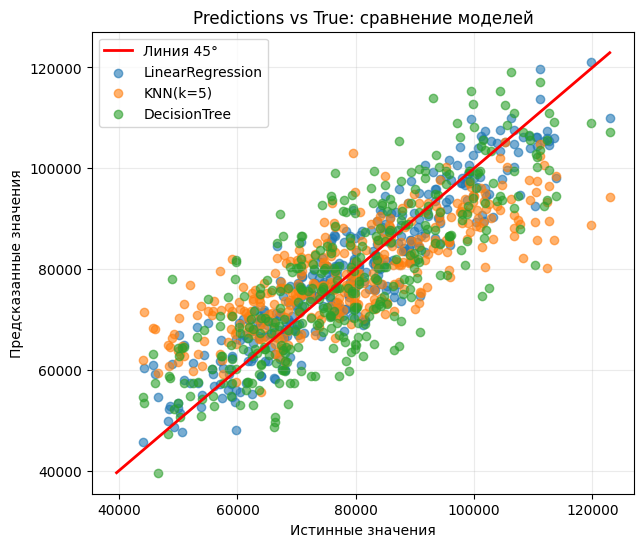


Лучшая модель по R²: LinearRegression (R²=0.8591, RMSE=6117.1455)


In [15]:
#Совмещённая визуализация Predictions vs True для всех моделей
plt.figure(figsize=(7,6))
vmin = min(y_valid.min(), lin_pred.min(), knn_pred.min(), tree_pred.min())
vmax = max(y_valid.max(), lin_pred.max(), knn_pred.max(), tree_pred.max())
plt.plot([vmin, vmax], [vmin, vmax], 'r-', lw=2, label="Линия 45°")

plt.scatter(y_valid, lin_pred, alpha=0.6, label="LinearRegression")
plt.scatter(y_valid, knn_pred, alpha=0.6, label="KNN(k=5)")
plt.scatter(y_valid, tree_pred, alpha=0.6, label="DecisionTree")

plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Predictions vs True: сравнение моделей")
plt.legend(); plt.grid(True, alpha=0.25)
plt.show()

#Краткая текстовая интерпретация
best = metrics_table.sort_values("R2", ascending=False).iloc[0]
print(f"\nЛучшая модель по R²: {best['Model']} (R²={best['R2']:.4f}, RMSE={best['RMSE']:.4f})")

Реализованы три модели регрессии:
* LinearRegression
    1) R² = 0.8591 — модель объясняет ~86% дисперсии зарплаты,
    что говорит о высокой точности и устойчивости
    2) Ошибки MAE и RMSE — минимальные среди всех моделей
    3) На графике точки плотно располагаются вдоль линии 45°,
    т.е. модель хорошо калибрована, без систематического смещения

Линейная зависимость здесь действительно адекватно отражает реальные закономерности, данные хорошо описываются линейной комбинацией признаков.
* KNeighborsRegressor (k=5)
    1) Значительно хуже показатели: R² ≈ 0.60, ошибки в 1.5–2 раза больше
    2) Модель опирается только на локальные соседства и не улавливает глобальные тренды
    3) Возможна пере/недообученность из-за неподходящего k (при слишком малом k — шум, при слишком большом — усреднение)

KNN плохо подходит для задачи с большим числом признаков и неравномерными масштабами, особенно если зависимость близка к линейной.
* DecisionTreeRegressor
    1) R² = 0.619 — чуть лучше, чем KNN, но заметно хуже линейной модели
    2) Ошибки также в 1.5–2 раза больше, чем у LinearRegression.
    3) Дерево хорошо адаптируется к локальным паттернам, но при этом может переобучаться, если не ограничить max_depth.

Дерево способно уловить нелинейные зависимости, но на этих данных это не даёт преимущества — линейная структура преобладает.


По результатам сравнения моделей наилучшее качество показала LinearRegression
(R² = 0.8591, RMSE = 6117).

Это означает, что зависимость между признаками и зарплатой в данных в целом линейная,
а добавление нелинейных методов (KNN, Decision Tree) не дало улучшения.

Линейная регрессия обеспечивает наименьшую ошибку, лучшую интерпретируемость и устойчивость.
Следовательно, целесообразно использовать именно её для прогнозирования заработной платы.